In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('creditcard.csv')


In [3]:
#making a copy of it
df=data.copy()

In [4]:
#Checking for any null values
data.isnull().sum().max()
# so no null data we do not need to worry about null rows now

0

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print('No Frauds',round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset=',data['Class'].value_counts()[0],'records')
print('Frauds',round(data['Class'].value_counts()[1]/len(data)*100,2), '% of the dataset=',data['Class'].value_counts()[1],'records')

No Frauds 99.83 % of the dataset= 284315 records
Frauds 0.17 % of the dataset= 492 records


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

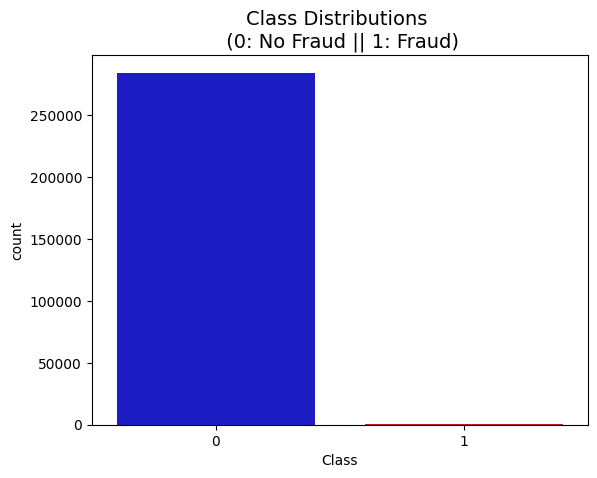

In [8]:
colors = ["#0101DF", "#DF0101"]

sns.countplot( x='Class',data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

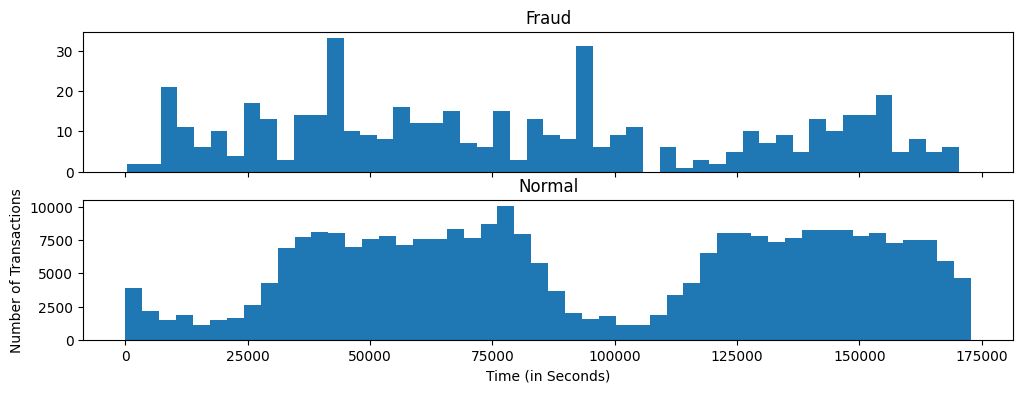

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')


ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [10]:
df['Amount'].values

array([149.62,   2.69, 378.66, ...,  67.88,  10.  , 217.  ])

In [11]:
# All the features of this dataset, except for time and amount, have already undergone PCA transformation which mean that 
#they have already been scaled. In this step we will scale the 'Amount' feature.
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler,normalize

mm_scaler=MinMaxScaler(feature_range=(0,1))
#rob_scaler=RobustScaler()
#std_scaler = StandardScaler()
#norm = normalize()

df['scaled_amount'] = mm_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop('Amount', axis=1, inplace=True)



#df['scaled_time']=norm.fit_transform(df['Time'].values.reshape(-1,1))
#Actually Time column is a kind of outlier so any scaling is not working for it
#so that's why we arre taking it to be in sin andd cos format

In [12]:
seconds_in_day=24*60*60

df['sin_time']=np.sin(2*np.pi*df.Time/seconds_in_day)
df['cos_time']=np.cos(2*np.pi*df.Time/seconds_in_day)

df.drop('Time', axis=1, inplace=True)


In [13]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,scaled_amount,sin_time,cos_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.005824,0.000000,1.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000105,0.000000,1.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.014739,0.000073,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.004807,0.000073,1.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.002724,0.000145,1.0


In [14]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

X_orig=df.drop('Class', axis=1)
Y_orig=df['Class']
df=df.sample(frac=1)

#amount of fraud classes 492 rows.
fraud_df=df.loc[df['Class']==1]
non_fraud_df=df.loc[df['Class']==0][:492]

normal_distributed_df=pd.concat([fraud_df, non_fraud_df])

#Shuffle dataframe rows
new_df=normal_distributed_df.sample(frac=1, random_state=42)

X=new_df.drop('Class', axis=1)
Y=new_df['Class']

In [15]:
# Modeling the upsamled data as is using kmeans clustering

from sklearn.cluster import KMeans

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [16]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X_orig)
labels=kmeans.predict(X_orig)

kmeans_RI=adjusted_rand_score(Y_orig, labels)
print("KMeans RI score:", kmeans_RI)
f1=f1_score(Y_orig, labels)
print("f1 score:",f1)
precision=precision_score(Y_orig, labels)
print("precision:",precision)
recall=recall_score(Y_orig, labels)
print("recall:",recall)
average_precision=average_precision_score(Y_orig, labels)
print("Average Precision-Recall Score:", average_precision)
accuracy=accuracy_score(Y_orig, labels)
print("Accuracy:", accuracy)

C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans RI score: -0.0001480139167940794
f1 score: 0.001982395147570087
precision: 0.0009948180373873406
recall: 0.27235772357723576
Average Precision-Recall Score: 0.0015279379527883656
Accuracy: 0.5262686661493573


In [17]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(X)
kmeans_RI=adjusted_rand_score(Y, clustering)
print("KMeans RI score:", kmeans_RI)
f1=f1_score(Y,clustering )
print("f1 score:",f1)
precision=precision_score(Y, clustering)
print("precision:",precision)
recall=recall_score(Y, clustering)
print("recall:",recall)
average_precision=average_precision_score(Y, clustering)
print("Average Precision-Recall Score:", average_precision)
accuracy=accuracy_score(Y, clustering)
print("Accuracy:", accuracy)



KMeans RI score: 0.0003721959661186011
f1 score: 0.0398406374501992
precision: 1.0
recall: 0.02032520325203252
Average Precision-Recall Score: 0.5101626016260163
Accuracy: 0.5101626016260162


## Lets try these same clustering algorithms with over sampling the under represented(fraud) data

In [18]:
from sklearn.utils import resample

X_new=df.copy()

# separate minority and majority classes
not_fraud=X_new[X_new.Class==0]
fraud=X_new[X_new.Class==1]

# upsamle minority
fraud_upsampled=resample(fraud, replace=True, n_samples=len(not_fraud),random_state=27)

# combine majority and unsampled minority
upsampled=pd.concat([not_fraud, fraud_upsampled])

#print(upsampled.Class.value_counts())

y_upsampled=upsampled.Class
x_upsampled=upsampled.drop('Class', axis=1)

### For AGNEST
upsampled=upsampled.sample(frac=1, random_state=42)

fraud_df=upsampled.loc[upsampled['Class']==1][:900]
non_fraud_df=upsampled.loc[upsampled['Class']==0][:900]

new_df=pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_dff=new_df.sample(frac=1, random_state=42)

X_agnest=new_df.drop('Class', axis=1)
Y_agnest=new_df['Class']



In [19]:
Y_agnest.value_counts()

Class
1    900
0    900
Name: count, dtype: int64

In [20]:
# Modeling the upsampled data as is using kmeans clustering

kmeans=KMeans(n_clusters=2)
kmeans.fit(x_upsampled)
labels=kmeans.predict(x_upsampled)


f1=f1_score(y_upsampled, labels)
print("f1 score:",f1)
precision=precision_score(y_upsampled, labels)
print("precision:",precision)
recall=recall_score(y_upsampled, labels)
print("recall:",recall)
average_precision=average_precision_score(y_upsampled, labels)
print("Average Precision-Recall Score:", average_precision)
accuracy=accuracy_score(y_upsampled, labels)
print("Accuracy:", accuracy)


C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


f1 score: 0.5040956057905434
precision: 0.4026308600727059
recall: 0.6739285651478114
Average Precision-Recall Score: 0.4343801552391222
Accuracy: 0.3370223167965109


In [21]:
clustering = AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(X_agnest)
kmeans_RI=adjusted_rand_score(Y_agnest, clustering)
print("KMeans RI score:", kmeans_RI)
f1=f1_score(Y_agnest,clustering )
print("f1 score:",f1)
precision=precision_score(Y_agnest, clustering)
print("precision:",precision)
recall=recall_score(Y_agnest, clustering)
print("recall:",recall)
average_precision=average_precision_score(Y_agnest, clustering)
print("Average Precision-Recall Score:", average_precision)
accuracy=accuracy_score(Y_agnest, clustering)
print("Accuracy:", accuracy)


KMeans RI score: 0.00046940804625782964
f1 score: 0.04347826086956522
precision: 1.0
recall: 0.022222222222222223
Average Precision-Recall Score: 0.5111111111111111
Accuracy: 0.5111111111111111


## Lets try under sampling the over-represented negative(non-fraud) class

In [22]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled=resample(not_fraud, replace=False, n_samples=len(fraud), random_state=27)

# combine minority and downsampled majority
downsampled=pd.concat([not_fraud_downsampled, fraud])

#checking counts
downsampled.Class.value_counts()

y_undersampled=downsampled.Class
x_undersampled=downsampled.drop('Class', axis=1)

In [23]:
# Modeling the undersampled data as is using kmeans clustering

kmeans=KMeans(n_clusters=2)
kmeans.fit(x_undersampled)
labels=kmeans.predict(x_undersampled)

f1=f1_score(y_undersampled, labels)
print("f1 score:",f1)
precision = precision_score(y_undersampled, labels)
print("precision :",precision)
recall = recall_score(y_undersampled, labels)
print("recall :",recall)
average_precision = average_precision_score(y_undersampled, labels)
print("Average Precision-Recall Score :",average_precision)
accuracy = accuracy_score(y_undersampled, labels)
print("Accuracy :",accuracy)

f1 score: 0.49079754601226994
precision : 1.0
recall : 0.3252032520325203
Average Precision-Recall Score : 0.6626016260162602
Accuracy : 0.6626016260162602


C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
# Modeling the undersampled data as is using AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(x_undersampled)

f1 = f1_score(y_undersampled, clustering)
print("f1 score :", f1)
precision = precision_score(y_undersampled, clustering)
print("precision :",precision)
recall = recall_score(y_undersampled, clustering)
print("recall :",recall)
average_precision = average_precision_score(y_undersampled, clustering)
print("Average Precision-Recall Score :",average_precision)
accuracy = accuracy_score(y_undersampled, clustering)
print("Accuracy :",accuracy)

f1 score : 0.0398406374501992
precision : 1.0
recall : 0.02032520325203252
Average Precision-Recall Score : 0.5101626016260163
Accuracy : 0.5101626016260162


## Lets try over-sampling the under-represented class using SMOTE(Synthetic Minority Over-sampling Technique) algorithm

In [25]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import SMOTE

# Seperate input features and target
y=df.Class
x=df.drop("Class", axis=1)

sm=SMOTE(random_state=27)#, ratio=1.0
upsamled=sm.fit_resample(x,y)
x_smote=upsampled.drop('Class', axis=1)
y_smote=upsampled.Class


fraud_df = upsampled.loc[upsampled['Class'] == 1][:500]
non_fraud_df = upsampled.loc[upsampled['Class'] == 0][:500]

new_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)

X_agnest = new_df.drop('Class', axis=1)
y_agnest = new_df['Class']


In [27]:
# Modeling the undersampled data using SMOTE and kmeans clustering

kmeans=KMeans(n_clusters=2)
kmeans.fit(x_smote)
labels=kmeans.predict(x_smote)

f1=f1_score(y_smote, labels)
print("f1 score:",f1)
precision = precision_score(y_smote, labels)
print("precision :",precision)
recall = recall_score(y_smote, labels)
print("recall :",recall)
average_precision = average_precision_score(y_smote, labels)
print("Average Precision-Recall Score :",average_precision)
accuracy = accuracy_score(y_smote, labels)
print("Accuracy :",accuracy)

C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


f1 score: 0.5040956057905434
precision : 0.4026308600727059
recall : 0.6739285651478114
Average Precision-Recall Score : 0.4343801552391222
Accuracy : 0.3370223167965109


In [28]:
# Modeling the undersampled data using SMOTE and AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(X_agnest)

f1 = f1_score(y_agnest, clustering)
print("f1 score :", f1)
precision = precision_score(y_agnest, clustering)
print("precision :",precision)
recall = recall_score(y_agnest, clustering)
print("recall :",recall)
average_precision = average_precision_score(y_agnest, clustering)
print("Average Precision-Recall Score :",average_precision)
accuracy = accuracy_score(y_agnest, clustering)
print("Accuracy :",accuracy)

f1 score : 0.046875
precision : 1.0
recall : 0.024
Average Precision-Recall Score : 0.512
Accuracy : 0.512
